<h5 style=''>第一次作品:主成分分析應用於群組資料之探討</h5>
<ul>
    <b><span style=''>學號:</b> <span style=''>  
    711331135</span></li>
    <p><b><span style=''>姓名:</b> <span style=''>  
    王宣懿</span></li>
    <p><b><span style=''>作品目標:
    <p><b><span style=''>1.使用 PCA 降維處理資料集，觀察各主成分的貢獻率與特徵向量。</b> <span style=''>  </span></li>
    <p><b><span style=''>2.將原始資料投影至前兩個主成分所構成的平面，以利視覺化與聚類效果分析。</b> <span style=''>  </span></li>
    <p><b><span style=''>3.理解 PCA 與原始變數間的關係，探討其在機器學習前處理中的角色。</b> <span style=''>  </span></li>
    </ul>
</ul>

<h5 style=''>習題 1：有一組資料來自義大利某個地區三個紅酒製造商所產的紅酒，資料內容包括的 178 支紅酒的 13 種化學成分。利用這組資料回答下列問題</h5>
<ul>
    <p><span style=''>  
    資料來源:</span>
    <b><p>1.</b> <span style=''>  
    觀察資料。</span>
    <b><p>2.</b> <span style=''>  繪製變數間的相關係數圖，以觀察變數間是否存在相關性</span>
    <b><p>3.</b><span style=''>  繪製一張含每個化學成分的盒鬚圖，觀察每個變數的 scaling。</span>
    <b><p>4.</b><span style=''> 進行主成分分析，繪製特徵值由大而小的分布與 scree plot。</span>
    <b><p>5.</b><span style=''> 利用主成分分析取得前兩項成分，並繪製其散布圖。是否可以從兩個主成分的散布圖中看出三個酒莊群組，並觀察是否先做標準化可能會影響結果。</span>
    <b><p>6.</b><span style=''> 依據每個資料的標籤，為每個在散布圖上的資料點塗上顏色</span>
    <b><p>7.</b><span style=''> 採三個主成分繪製立體圖</span>
    <b><p>8.</b><span style=''>可否從 Z1 與 Z2 的組成係數，看出原變數哪個比較重要，提供觀察與猜測</span>
</ul>

<h5 style=''>1.觀察資料</h5>
<ul>
    <p><li><b>.head() 呈現前五筆資料:</b> <span style=''>  
    <p><li><b>.columns 呈現變數名稱:</b><span style=''> 呈現變數名稱</li>
    <p>['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
    <p>'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
    <p>'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
    <p><li><b>.shape 呈現資料形狀:</b><span style=''> </li>
    <p>178個樣本，13個特徵

</ul>

In [10]:
import pandas as pd
data=pd.read_excel("C:/Users/User/Downloads/wine (1).xlsx")
df=data.copy()

print(df.head())

del (df["Customer_Segment"])
print(df.head())

column_name=df.columns
print(column_name)
print(f'Sample size:{df.shape[0]}')
print(f"Number of features{df.shape[1]}")

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Customer_Segment  
0   3.92     1065                 1  
1   3.40     105

<h5 style=''>2.盒鬚圖觀察每數據標準差前及後的變數分布</h5>
<ul>
    <p><li><b>scaler.fit_transform() 標準化資料:</b><p><span style=''>  
    標準化後資料名稱為df_。
    <p><li><b>.boxplot() 繪製箱形圖:</b><p><span style=''> 箱型圖名稱分別為Original Data及Standarddization Data，觀察標準差前後資料的差別。
    <p><span style=''>1. Original Data<p><span style=''>參數Proline全距範圍最廣，其他參數全距範圍窄且多分布於0附近。 
    <p><span style=''>2. Standardization Data<p> <span style=''>  在平均值為0，標準差為1的情況下，變數之間分布更為一致，同時也出現更多離異值。 
</ul>

C:\Users\User\AppData\Local\Temp\ipykernel_26560\3015720120.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot(df,boxprops=boxprops,flierprops=flierprops,labels=column_name,vert=False)
C:\Users\User\AppData\Local\Temp\ipykernel_26560\3015720120.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot(df_, boxprops = boxprops, \


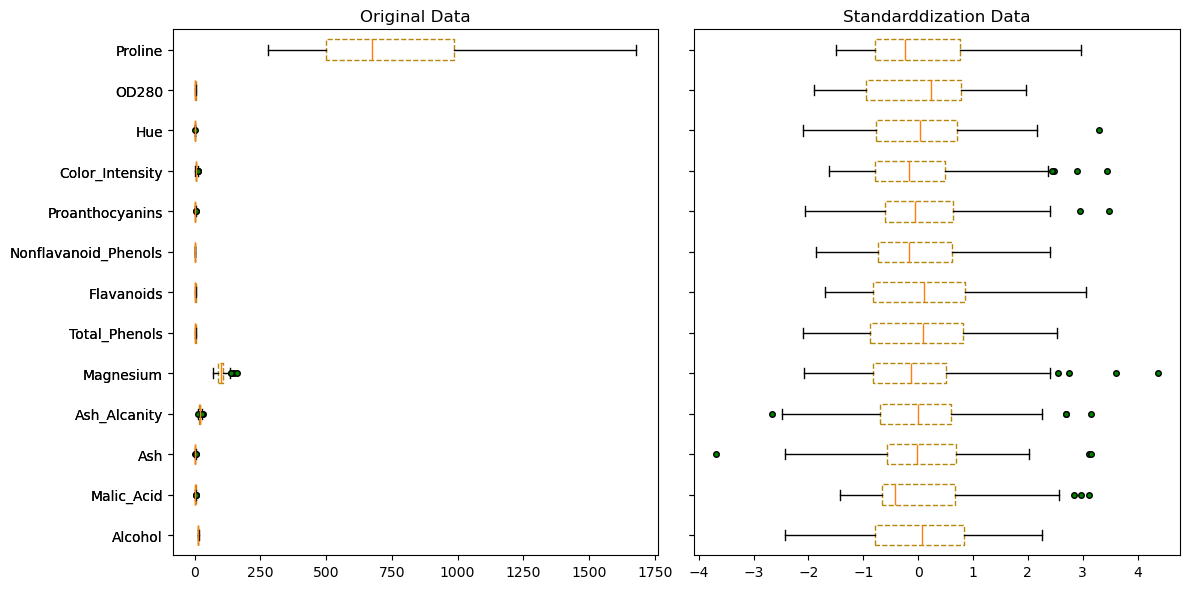

In [11]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
scaler=StandardScaler()
df_=scaler.fit_transform(df)

fig, ax = plt.subplots(1,2,figsize=(12,6),sharey=True)
boxprops = dict(linestyle = '--', linewidth = 1, \
color = 'darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor = 'green',
markersize = 4, linestyle = 'none')
ax[0].boxplot(df,boxprops=boxprops,flierprops=flierprops,labels=column_name,vert=False)
ax[0].set_title("Original Data")

ax[1].boxplot(df_, boxprops = boxprops, \
flierprops = flierprops, \
labels = column_name, vert = False)
ax[1].set_title("Standarddization Data")
plt.tight_layout()
plt.show()

<ul>
    <p><b>數據發現:</b> <span style='color:white;'>  
    <p><li><b>Proline有較大範圍，遠遠超過其他變數的尺度</b><span style='color:white;'> </li>
    <p><li><b> 標準化後，異常值更明顯</b><span style='color:white;'> </li>

</ul>

<h5 style=''>3.相關係數圖觀察變數間是否存在相關性</h5>
<ul>
    <p><li><b>pd.DataFrame 將資料型態轉成表格:</b><p><span style=''>  
    表格名稱為df__
    <p><li><b>.corr() 算相關係數:</b><p><span style='color:white;'> R為相關係數變數名稱</li>
    <p><li><b>sns.heatmap 製作熱圖:</b><p><span style=''>
    <p><span style=''>1. 高相關性變數:<p><span style=''><p>
        <ul>
        <li><p>Flavanoids 與 Total_Phenols（0.86）
        <li><p>OD280 與 Flavanoids（0.79）
        </ul>
    <p><span style=''>2. 低相關性變數:<p><span style=''><p>
        <ul>
        <li><p>OD280 與 Ash（0.039）
        <li><p>Magnesium 與 Malic_Acid（0.055）
        </ul>
        

</ul>

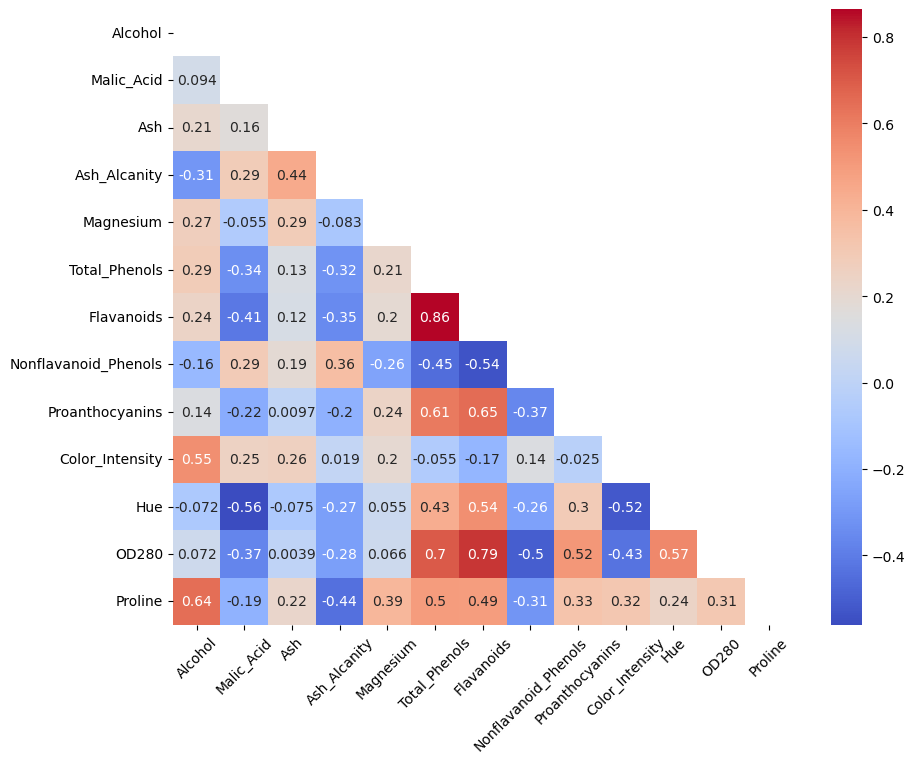

In [12]:
import seaborn  as sns
import pandas as pd
import numpy as np
df__=pd.DataFrame(df_,columns=column_name)
R=df__.corr()
mask=np.triu(np.ones_like(R,dtype=bool))
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(R,annot=True,mask=mask,cmap="coolwarm")
plt.xticks(rotation=45)
plt.show()

<h5 style=''>4.進行主成分分析，繪製特徵值由大而小的分布</h5>
<ul>
    <p><li><b>eig 計算eigenvalues、eigenvectors</b><p><span style=''>  
    <p><li><b>np.argsort 返回排序後的索引:</b><p><span style=''> 變數名稱eigenvalues、eigenvectors分別為依照降序排序的特徵值及特徵向量</li>
     <p><li><b>eigvecs@np.diag(eigvals)@eigvecs.T:</b><p><span style=''> 變數名稱Sigma_x為原來的共變異數矩陣 </li>
    <p><li><b>plt.plot 製作折線圖:</b><p><span style=''>觀察前幾個主成分的特徵值大小</li>
    <p><li><b>plt.plot 製作折線圖及長條圖:</b><p><span style=''>藍色長條圖為各主成分的變異量，紅色線為累積變異比例。</li>
</ul>

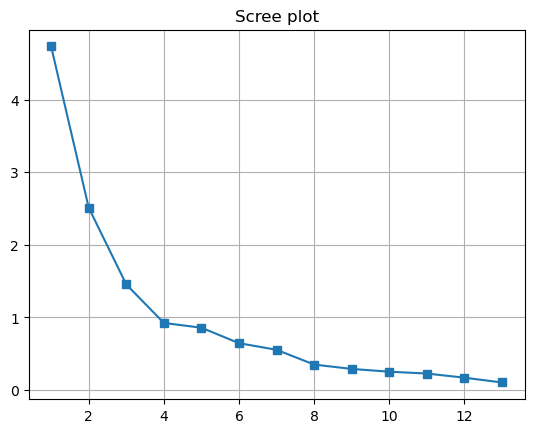

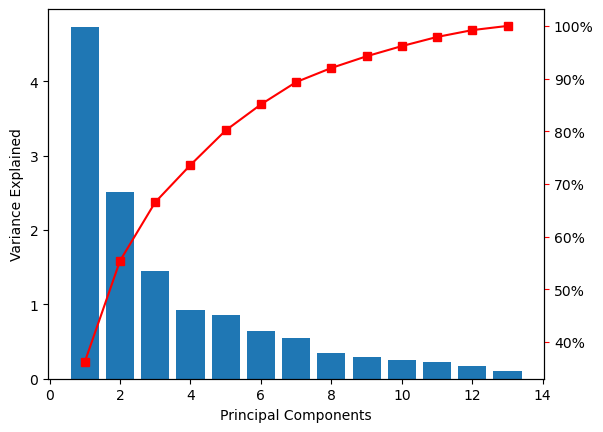

In [14]:
from matplotlib.ticker import PercentFormatter
from numpy.linalg import eig
Sx_numpy=np.cov(df_.T,bias=False) #形狀（n_features × n_samples）
w,v=eig(Sx_numpy)
idx=np.argsort(-w)
eigvals=w[idx]
eigvecs=v[:,idx]
Sigma_x=eigvecs@np.diag(eigvals)@eigvecs.T
#print(Sigma_x)

#第一張圖：Scree Plot
plt.figure()
x=np.arange(1,1+len(eigvals))
plt.plot(x,eigvals,marker='s')
plt.title('Scree plot')
plt.grid(True)
ax.set_xlabel('Eigenvalues')
ax.set_xlabel('Principal Components')
plt.show()

#第二張圖：解釋變異比例
fig,ax=plt.subplots()
x=np.arange(1,len(eigvals)+1)
ax.bar(x,eigvals)

ax2=ax.twinx() # instantiate a second axes that shares the same x-axis
ax2.plot(x,eigvals.cumsum()/eigvals.sum()*100,marker='s',color="red")
ax2.tick_params(axis='y',color='red')
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.set_xlabel('Principal Components')
ax.set_ylabel('Variance Explained')
plt.show()

<ul>
    <p><b>數據發現:</b> <span style=''>  
    <p><li><b><span style=''> 第一個主成分的特徵值最高，遠大於其他主成分<span style=''> </li>
    <p><li><b><span style=''>依據肘部法則（Elbow Method），最佳的主成分數量可能為2或3個<span style=''> </li>
    <p><li><b><span style=''>如果保持更高的資訊量（90% 以上變異解釋），要選擇7到8個主成分<span style=''> </li>

</ul>

<h5 style=''>5.利用標準化後數據提取前兩項主成分繪製三個酒莊群組散布圖。</h5>
<ul>
    <p><li><b>PCA(n_components=2):</b><p><span style=''> 降維至二維，選擇最重要的兩個主成分表示數據</li>
     <p><li><b>pca.fit_transform:</b><p><span style=''> 計算降維後兩個主成分分別為Z1及Z2</li>
     <p><li><b>pca.explained_variance_:</b><p><span style=''> 計算降維後新變數 Z1, Z2的變異數</li>
    <p><li><b>pca.explained_variance_ratio_:</b><p><span style=''> 每個主成分解釋總變異的比例</li>
    <p><li><b>pca.components_:</b><p><span style=''>主成分的方向代表新的座標軸，參數v1為新座標軸Z1向量，參數v2為新座標軸Z2向量</li>
    <p><li><b>ax.scatter:</b><p></li>
        <p><span style=''>1. Z1 vs Z2 (Standardization):<p><span style=''><p>
        <ul>
        <li><p>數據的分佈較為對稱，且範圍約落在 Z1, Z2 ∈ [-4, 4]。
        <li><p>資料呈現弧形分佈，表示Z1及Z2為非線性關係。 
        </ul>
    <p><span style=''>2.Z1 vs Z2 (Unstandardization):<p><span style=''><p>
        <ul>
        <li><p>數據點範圍極不對稱，Z1 軸上數值範圍約在 [-400, 800]，Z2 則在 [-20, 60]。
        <li><p>數據擠在一起，部分變數影響過大
        <li><p>變異數大的變數主導結果
        </ul>

        

</ul>

explained_variance :
[99201.78951748   172.53526648]
explained_variance_ratio:
[0.99809123 0.00173592]
components:
[[ 1.65926472e-03 -6.81015556e-04  1.94905742e-04 -4.67130058e-03
   1.78680075e-02  9.89829680e-04  1.56728830e-03 -1.23086662e-04
   6.00607792e-04  2.32714319e-03  1.71380037e-04  7.04931645e-04
   9.99822937e-01]
 [ 1.20340617e-03  2.15498184e-03  4.59369254e-03  2.64503930e-02
   9.99344186e-01  8.77962152e-04 -5.18507284e-05 -1.35447892e-03
   5.00440040e-03  1.51003530e-02 -7.62673115e-04 -3.49536431e-03
  -1.77738095e-02]]
v1:
[ 1.65926472e-03 -6.81015556e-04  1.94905742e-04 -4.67130058e-03
  1.78680075e-02  9.89829680e-04  1.56728830e-03 -1.23086662e-04
  6.00607792e-04  2.32714319e-03  1.71380037e-04  7.04931645e-04
  9.99822937e-01]
v2:
[ 1.20340617e-03  2.15498184e-03  4.59369254e-03  2.64503930e-02
  9.99344186e-01  8.77962152e-04 -5.18507284e-05 -1.35447892e-03
  5.00440040e-03  1.51003530e-02 -7.62673115e-04 -3.49536431e-03
 -1.77738095e-02]


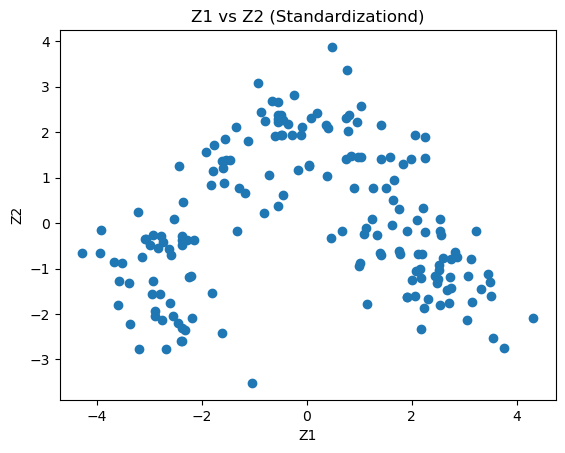

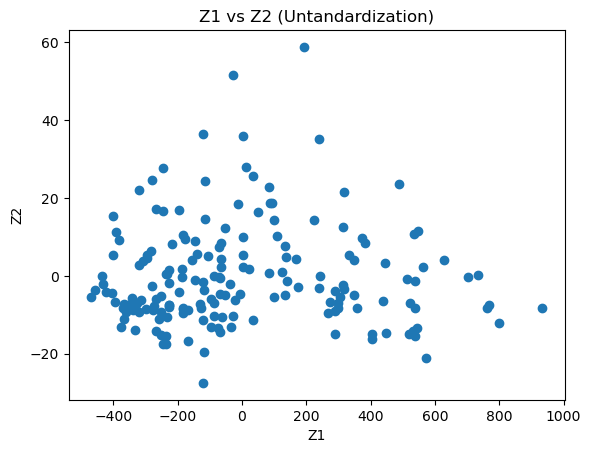

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

import numpy as np
Scov = np.cov(df_standardized.T)
eigenvalues,eigenvectors=np.linalg.eig(Scov)
idx=eigenvalues.argsort()[::-1]
eigenvalues=eigenvalues[idx]
eigenvectors_1=eigenvectors[:,idx]
#print("eigenvalues:\n{}".format(eigenvalues))
#print("eigenvectors:\n{}".format(eigenvectors_1))
pca=PCA(n_components=2)
Z=pca.fit_transform(df_)
Z1=Z[:,0]
Z2=-Z[:,1]


#pca.fit_transform(df_standardized)本質上就是 np.dot(df_standardized, pca.components_.T)
UZ=pca.fit_transform(df)
UZ1=UZ[:,0]
UZ2=UZ[:,1]

#print("Z:\n{}".format(Z))
print("explained_variance :\n{}".format(pca.explained_variance_)) #第一個主成分(pc1)解釋單位的變異數，第二個主成分(PC2)解釋17210變異數
print("explained_variance_ratio:\n{}".format(pca.explained_variance_ratio_))
print("components:\n{}".format(pca.components_))

v1=pca.components_[0]#如果 v1 是從 pca.components_ 來的，它會是 橫向（row vector）
print("v1:\n{}".format(v1))

v2=pca.components_[1]
print("v2:\n{}".format(v2))

#v1和v2是數據的主成分，它們來自 pca.components_，是 PCA 提取出的 正交基底 (orthogonal basis)。

#print(v1.shape)
#print(df_.shape)

#Z1 vs Z2 (Unlabeled) plot
fig,ax=plt.subplots()
ax.scatter(Z1,Z2)
ax.set_xlabel("Z1")
ax.set_ylabel("Z2")
ax.set_title("Z1 vs Z2 (Standardizationd)")
plt.show()

Z=Z.T
#print(Z.shape)

fig,ax=plt.subplots()
ax.scatter(UZ1,UZ2)
ax.set_xlabel("Z1")
ax.set_ylabel("Z2")
ax.set_title("Z1 vs Z2 (Untandardization)")
plt.show()


<h5 style=''>6.依據每個資料的標籤形成散布圖。</h5>
<ul>
    <p><li><b>fig.add_subplot 繪製標準後Z1及Z2散佈圖:</b><p></li>
    <p><span style=''>Z1 vs Z2 (Labeled)<p><span style=''><p>

        

</ul>

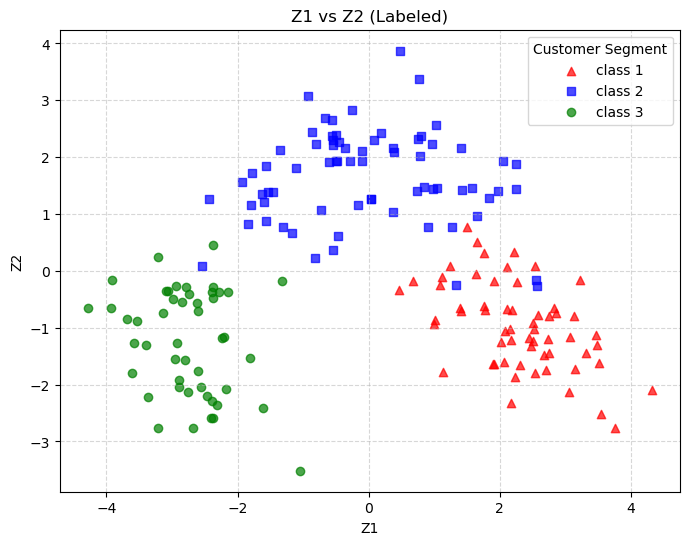

In [17]:
#Z1 vs Z2 (Labeled) plot
labels = data["Customer_Segment"]
class_markers = {1: "^", 2: "s", 3: "o"} 
class_colors = {1: "red", 2: "blue", 3: "green"} 
fig, ax = plt.subplots(figsize=(8,6))
for class_label in np.unique(labels):
    idx = labels == class_label  # 找到屬於該類別的數據
    ax.scatter(Z1[idx], Z2[idx], 
               label=f"class {class_label}", 
               marker=class_markers[class_label], 
               color=class_colors[class_label], 
               alpha=0.7)
ax.set_xlabel("Z1")
ax.set_ylabel("Z2")
ax.set_title("Z1 vs Z2 (Labeled)")
ax.legend(title="Customer Segment")
ax.grid(True, linestyle="--", alpha=0.5)
plt.show()

<ul>
    <p><b>數據發現:</b> <span style=''>  
    <p><li><b><span style=''>Z1 vs Z2標準化數據: 
        <ul>
        <p>紅色三角形（Class 1）：主要分佈在 Z1 > 1，Z2 < 0
        <p>藍色方塊（Class 2）：主要分佈在 2 > Z1 > -2，Z2 > 0
        <p>綠色圓形（Class 3）：主要分佈在 Z1 < -2，Z2 < 0
      </ul>
</ul>

<h5 style=''>7.採三個主成分繪製立體圖</h5>
<ul>
    <p><li><b>pca.fit_transform:</b><p><span style=''> 計算降維後兩個主成分分別為Z1及Z2及Z3</li>
    <p><li><b>pca.explained_variance_:</b><p><span style=''> 計算降維後新變數 Z1, Z2 ,Z3的變異數</li>
    <p><li><b>pca.explained_variance_ratio_:</b><p><span style=''> 每個主成分解釋總變異的比例</li>
    <p><li><b>pca.components_:</b><p><span style=''>主成分的方向代表新的座標軸，參數v1為新座標軸Z1向量，參數v2為新座標軸Z2向量,參數v3為新座標軸Z3向量</li>
    <p><li><b>fig.add_subplot:</b><p></li>
    <p><span style=''>Z1 vs Z2 vs Z3<p><span style=''><p>
</ul>

explained_variance :
[4.73243698 2.51108093 1.45424187]
explained_variance_ratio:
[0.36198848 0.1920749  0.11123631]
components:
[[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [ 0.48365155  0.22493093  0.31606881 -0.0105905   0.299634    0.06503951
  -0.00335981  0.02877949  0.03930172  0.52999567 -0.27923515 -0.16449619
   0.36490283]
 [-0.20738262  0.08901289  0.6262239   0.61208035  0.13075693  0.14617896
   0.1506819   0.17036816  0.14945431 -0.13730621  0.08522192  0.16600459
  -0.12674592]]
v1:
[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
  0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
  0.28675223]
v2:
[ 0.48365155  0.22493093  0.31606881 -0.0105905   0.299634    0.06503951
 -0.00335981  0.02877949  0.03930172  0.52999567 -0.27923515 -0.16449619
  0.36490283]
v3:
[-0.20738262  0.08901289  0.6262239   0.61208035 

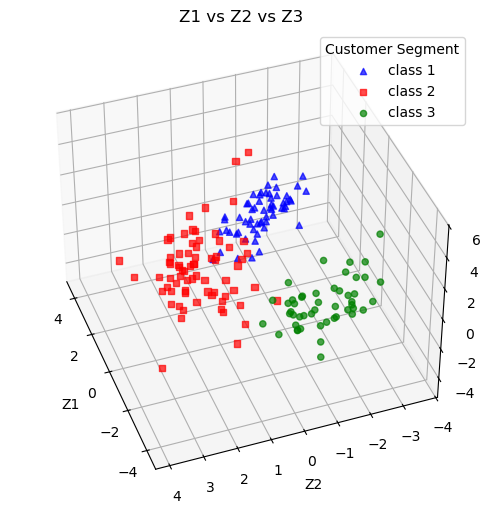

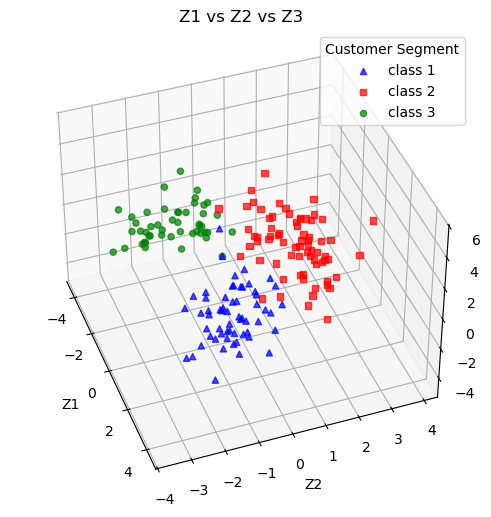

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

scaler=StandardScaler()
df_standardized=scaler.fit_transform(df)#df_standardized.shape = (樣本數 m, 特徵數 n)
pca=PCA(n_components=3)
Z=pca.fit_transform(df_standardized)
#print("Z:\n{}".format(Z))
print("explained_variance :\n{}".format(pca.explained_variance_)) 
print("explained_variance_ratio:\n{}".format(pca.explained_variance_ratio_))
print("components:\n{}".format(pca.components_))

v1=pca.components_[0]#如果 v1 是從 pca.components_ 來的，它會是 橫向（row vector）
print("v1:\n{}".format(v1))

v2=pca.components_[1]
print("v2:\n{}".format(v2))

v3=pca.components_[2]
print("v3:\n{}".format(v3))

#v1和v2是數據的主成分，它們來自 pca.components_，是 PCA 提取出的 正交基底 (orthogonal basis)。

print(v1.shape)
print(df_standardized.shape)

Z1,Z2,Z3=Z[:,0],-Z[:,1],Z[:,2]


Z=Z.T
#print(Z.shape)

#scatter() 只接受 2D 資料
#ax = fig.add_subplot(projection='3d') 來啟用 3D 視圖
#color 參數應該改成 c

labels = data["Customer_Segment"]
class_markers = {1: "^", 2: "s", 3: "o"} 
class_colors = {1: "blue", 2: "red", 3: "green"} 


#160度 Z1 vs Z2 vs Z3 
fig = plt.figure(figsize=(10,6))
ax1=fig.add_subplot(111,projection="3d")

for class_label in np.unique(labels):
    idx = labels == class_label  # 找到屬於該類別的數據
    ax1.scatter(Z1[idx],Z2[idx],Z3[idx],
               label=f"class {class_label}", 
               marker=class_markers[class_label], 
               c=class_colors[class_label], 
               alpha=0.7)

ax1.set_title("Z1 vs Z2 vs Z3")
ax1.set_xlabel("Z1")
ax1.set_ylabel("Z2")
ax1.set_zlabel("Z3")
ax1.legend(title="Customer Segment")
ax1.grid(True, linestyle="--", alpha=0.5)
 
ax1.view_init(elev=40, azim=160) 
plt.show()

fig = plt.figure(figsize=(10,6))
ax2=fig.add_subplot(111,projection="3d")


#340度 Z1 vs Z2 vs Z3 
for class_label in np.unique(labels):
    idx = labels == class_label  # 找到屬於該類別的數據
    ax2.scatter(Z1[idx],Z2[idx],Z3[idx],
               label=f"class {class_label}", 
               marker=class_markers[class_label], 
               c=class_colors[class_label], 
               alpha=0.7)

ax2.set_title("Z1 vs Z2 vs Z3")
ax2.set_xlabel("Z1")
ax2.set_ylabel("Z2")
ax2.set_zlabel("Z3")
ax2.legend(title="Customer Segment")
ax2.grid(True, linestyle="--", alpha=0.5)
 
ax2.view_init(elev=40, azim=340) 
plt.show()


<ul>
    <p><b>數據發現:</b> <span style=''>  
    <p><li><b><span style=''>Z1、Z2、Z3標準化數據: 
      <ul>
        <p>Class 1 和 Class 2 在Z1-Z2呈現較為分開的分佈，但仍有部分重疊， Z3軸的資訊更明顯。
        <p>Class 3主要受 Z3 軸影響而區分出來，與 Class 1、Class 2 呈現較明顯的垂直分離。
      </ul>
</ul>

<h5 style=''>8.可否從 Z1 與 Z2 的組成係數，看出原變數哪個比較重要</h5>
<ul>
    <p><li><b>sns.heatmap 製作熱圖:</b><p><span style=''>PCA 降維後的新座標軸（主成分）主要由哪些原始變數組成 </li>
        <ul>
        <li><p>Z1主要由 Flavanoids (0.42)、Total_Phenols (0.39)、OD280 (0.38)、Proanthocyanins (0.31)、Hue (0.30)
        <li><p> Z2主要由 Color_Intensity (0.53)、Alcohol (0.48)、Proline (0.36)、Ash (0.32)
        </ul>

</ul>

                            Z1        Z2
Alcohol               0.144329  0.483652
Malic_Acid           -0.245188  0.224931
Ash                  -0.002051  0.316069
Ash_Alcanity         -0.239320 -0.010591
Magnesium             0.141992  0.299634
Total_Phenols         0.394661  0.065040
Flavanoids            0.422934 -0.003360
Nonflavanoid_Phenols -0.298533  0.028779
Proanthocyanins       0.313429  0.039302
Color_Intensity      -0.088617  0.529996
Hue                   0.296715 -0.279235
OD280                 0.376167 -0.164496
Proline               0.286752  0.364903


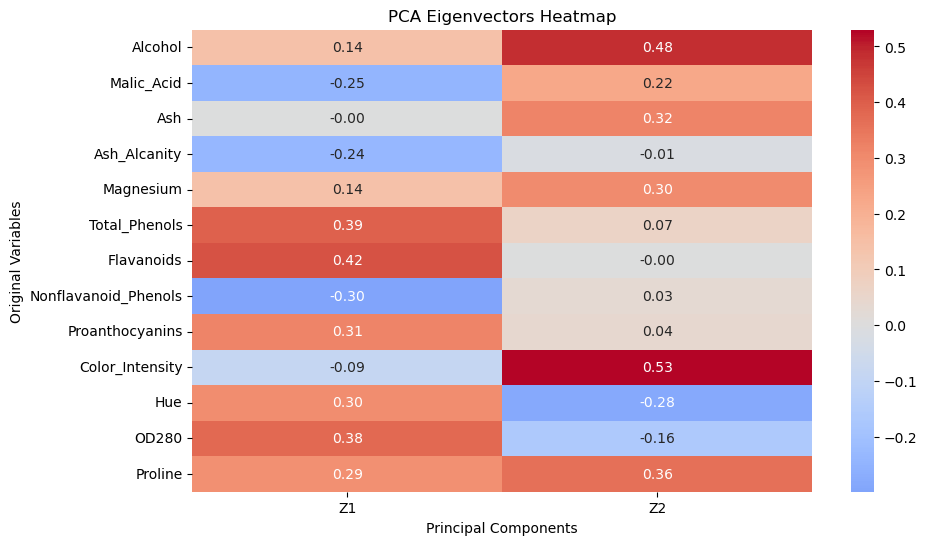

In [19]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df)
pca = PCA(n_components=2) 
Z = pca.fit_transform(df_standardized)
eigvecs = pca.components_
eigenvectors_df=pd.DataFrame(eigvecs.T,
                            columns=["Z1","Z2"],
                            index=df.columns)
print(eigenvectors_df)

fig,ax=plt.subplots(figsize=(10,6))
sns.heatmap(eigenvectors_df, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("PCA Eigenvectors Heatmap")
plt.xlabel("Principal Components")
plt.ylabel("Original Variables")
plt.show()

<h5 style=''>習題 2：<p>關於世界 263 個城市的生活品質排名，其中包含 8 個指標數字。在此可以將排名資料置換成代表生活品質的「標籤 labels」，譬如總分數（欄位 Quality of Life Index）200 分以上稱為「高品質」或「HIGH」，並配與數字 3；分數 100 ~200 稱為「中品質」或「MEDIUM」，並配與數字 2；總分 100 以下稱為「低品質」或「LOW」，並配與數字 1。</h5>
<ul>
    <p><span style=''>  
    資料來源:</span>
    <b><p>1.</b> <span style=''>  
    觀察資料。</span>
    <b><p>2.</b> <span style=''>  繪製變數間的相關係數圖，以觀察變數間是否存在相關性</span>
    <b><p>3.</b><span style=''>  繪製一張含每個化學成分的盒鬚圖，觀察每個變數的 scaling。</span>
    <b><p>4.</b><span style=''> 進行主成分分析，繪製特徵值由大而小的分布與 scree plot。</span>
    <b><p>5.</b><span style=''> 利用主成分分析取得前兩項成分，並繪製其散布圖。是否可以從兩個主成分的散布圖中看出三個生活品質群組，並觀察是否先做標準化可能會影響結果。</span>
    <b><p>6.</b><span style=''>採三個主成分繪製立體圖</span>
    <b><p>7.</b><span style=''>  從 Z1 與 Z2 的散佈圖進一步推敲，也許需要加入 Z3 才能分得更好，又或許去除 Z2 僅取 Z1 也可以分得不錯。</span>
    <b><p>8.</b><span style=''>可否從 Z1 與 Z2 的組成係數，看出原變數哪個比較重要，提供觀察與猜測</span>
</ul>

<h5 style=''>1.觀察資料</h5>
<ul>
    <p><li><b>.head() 呈現前五筆資料:</b> <span style=''>  
    <p><li><b>.columns 呈現變數名稱:</b><span style=''> 呈現變數名稱</li>
    <p>['Quality of Life Index', 'Purchasing Power Index', 'Safety Index',
    <p>'Health Care Index', 'Cost of Living Index',
    <p>'Property Price to Income Ratio', 'Traffic Commute Time Index',
    <p>'Pollution Index', 'Climate Index']
    <p><li><b>.shape 呈現資料形狀:</b><span style=''> </li>
    <p>263個樣本，9個特徵

</ul>

In [6]:
import pandas as pd
import numpy as np
data=pd.read_excel('data/2025_city_quality.xlsx')

df=data.iloc[:,2:]
print(df.head())
print(df.isna().sum())
y=df["Quality of Life Index"]
data["ranking"]=np.where(y>200,3,np.where(y>100,2,1))


column_name=df.columns
print(column_name)
print(f'Sample size:{df.shape[0]}')
print(f'Number of features{df.shape[1]}')


   Quality of Life Index  Purchasing Power Index  Safety Index  \
0                  229.0                   151.8          79.5   
1                  225.9                   153.5          78.1   
2                  219.9                   174.4          71.3   
3                  218.3                   140.6          78.4   
4                  217.0                   182.4          72.9   

   Health Care Index  Cost of Living Index  Property Price to Income Ratio  \
0               80.7                  58.3                             5.7   
1               76.4                  54.5                             5.0   
2               76.3                  66.0                             8.8   
3               79.0                  59.9                             6.4   
4               71.6                  98.0                             8.5   

   Traffic Commute Time Index  Pollution Index  Climate Index  
0                        21.0             17.9           90.6  
1     

<h5 style=''>2.盒鬚圖觀察每數據標準差前及後的變數分布</h5>
<ul>
    <p><li><b>scaler.fit_transform() 標準化資料:</b><p><span style=''>  
    標準化後資料名稱為df_。
    <p><li><b>.boxplot() 繪製箱形圖:</b><p><span style=''> 箱型圖名稱分別為Original Data及Standarddization Data，觀察標準差前後資料的差別。
    <p><span style=''>1. Original Data
    <ul>
    <p><li><span style=''>不同指標的數值範圍相差很大：<p>Quality of Life Index 的範圍明顯較廣而 Climate Index 的範圍則較小。
    <p><li><span style=''>異常值明顯：<p>Property Price to Income Ratio 和 Traffic Commute Time Index 的數值範圍也較小，但有一些異常值。 
    </ul>
    <p><span style=''>2. Standardization Data<p> <span style=''>     
    <ul>
    <p><li><span style=''>異常值依然存在：<p>標準化後，異常值依然存在，但可以直接從 Z-score 判斷它們在數據中的相對極端程度。。 
    </ul>
</ul>

C:\Users\User\AppData\Local\Temp\ipykernel_20744\3291784666.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot(df,boxprops=boxprops,flierprops=flierprops,labels=column_name,vert=False)
C:\Users\User\AppData\Local\Temp\ipykernel_20744\3291784666.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot(df_,boxprops=boxprops,flierprops=flierprops,labels=column_name,vert=False)


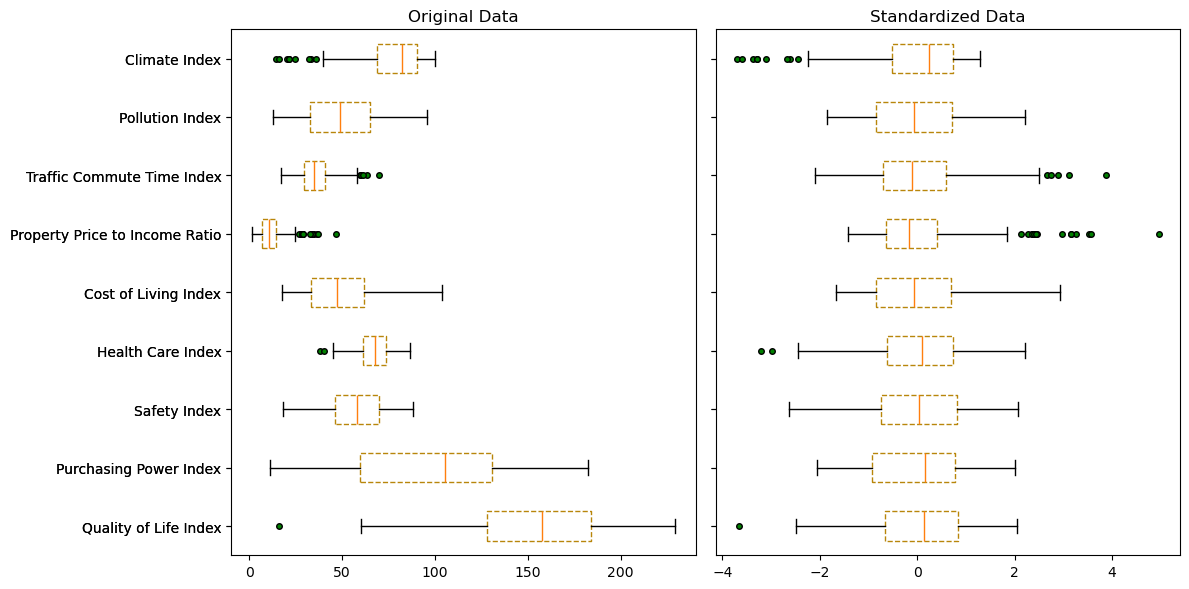

In [7]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
scaler=StandardScaler()
scaler.fit(df)
df_=scaler.transform(df)


fig, ax=plt.subplots(1,2,figsize=(12,6),sharey=True)
boxprops=dict(linestyle='--',linewidth=1,color="darkgoldenrod")
flierprops=dict(marker="o",markerfacecolor="green",markersize=4,linestyle="none")
ax[0].boxplot(df,boxprops=boxprops,flierprops=flierprops,labels=column_name,vert=False)
ax[0].set_title("Original Data")
ax[1].boxplot(df_,boxprops=boxprops,flierprops=flierprops,labels=column_name,vert=False)
ax[1].set_title("Standardized Data")
plt.tight_layout()
plt.show()

<ul>
    <p><b>數據發現:</b> <span style=''>  
    <p><li><b>Purchasing Power Index 也有較大範圍，這表示城市間的購買力差異大，有些城市的購買力極高，而有些城市則較低。</b><span style=''> </li>
    <p><li><b>Property Price to Income Ratio 有較多的離群值，這顯示在某些城市，房價相對於收入的負擔特別沉重。
    <p><li><b>Traffic Commute Time Index 也有離群值，代表某些城市的交通通勤時間特別長。</b></li>


</ul>

<h5 style=''>3.相關係數圖觀察變數間是否存在相關性</h5>
<ul>
    <p><li><b>pd.DataFrame 將資料型態轉成表格:</b><p><span style=''>  
    表格名稱為df__
    <p><li><b>.corr() 算相關係數:</b><p><span style=''> R為相關係數變數名稱</li>
    <p><li><b>sns.heatmap 製作熱圖:</b><p><span style=''>
    <p><span style=''>各變數影響因素<p>


</ul>

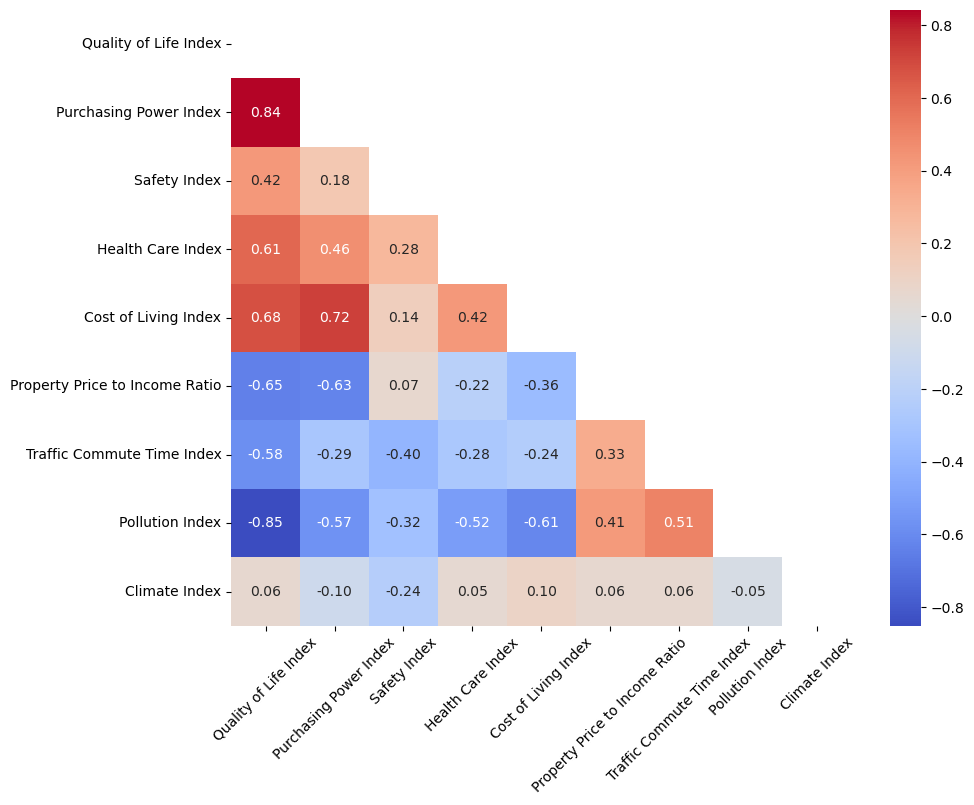

In [8]:
import seaborn as sns
df__=pd.DataFrame(df_,columns=column_name)
corr=df__.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(corr,mask=mask,annot=True,fmt=".2f",cmap="coolwarm")
plt.xticks(rotation=45)
plt.show()


<ul>
    <p><b>數據發現:</b> <span style=''>  
    <p><li><b><span style=''> Quality of Life Index正向影響:購買力指數(相關係數 0.84)<span style=''> </li>
    <p> <span style=''> Quality of Life Index負向影響:汙染指數(相關係數-0.85)</b> 
    <p><li><b><span style=''>Purchasing Power Index正向影響:生活成本指數(相關係數 0.72)<span style=''> </li>
    <p><span style=''> Purchasing Power Index負向影響:醫療指數(相關係數-0.52)</b></li>
    <p><li><b><span style=''>Pollution Index負向影響: 生活品質(相關係數 0.85)<span style=''> </li>

</ul>

<h5 style=''>4.進行主成分分析，繪製特徵值由大而小的分布</h5>
<ul>
    <p><li><b>eig 計算eigenvalues、eigenvectors</b><p><span style=''>  
    <p><li><b>np.argsort 返回排序後的索引:</b><p><span style=''> 變數名稱eigenvalues、eigenvectors分別為依照降序排序的特徵值及特徵向量</li>
     <p><li><b>eigvecs@np.diag(eigvals)@eigvecs.T:</b><p><span style=''> 變數名稱Sigma_x為原來的共變異數矩陣 </li>
    <p><li><b>plt.plot 製作折線圖:</b><p><span style=''>觀察前幾個主成分的特徵值大小</li>
    <p><li><b>plt.plot 製作折線圖及長條圖:</b><p><span style=''>藍色長條圖為各主成分的變異量，紅色線為累積變異比例。</li>
</ul>

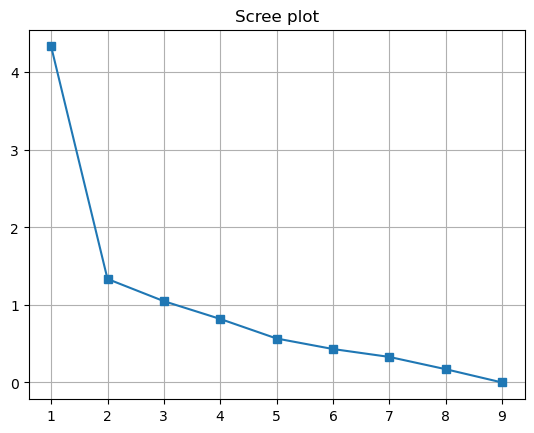

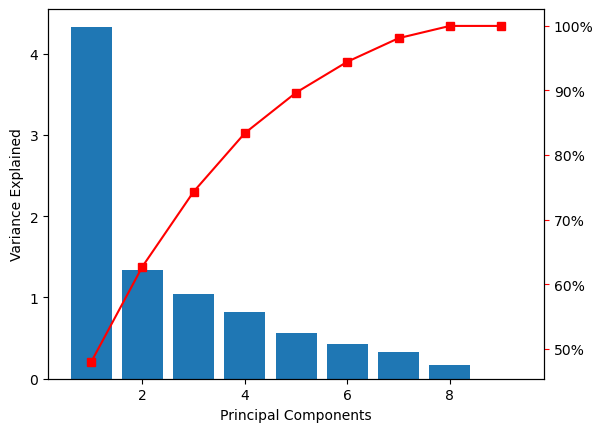

In [9]:
import numpy as np
from numpy.linalg import eig
Sx_numpy=np.cov(df_.T)
w,v=eig(Sx_numpy)
idx=np.argsort(-w)

eigenvectors=v[:,idx]
eigenvalues=w[idx]
Sigma_x=eigenvectors@np.diag(eigenvalues)@eigenvectors.T

from matplotlib.ticker import PercentFormatter
plt.subplot()
x=np.arange(1,1+len(eigenvalues))
plt.plot(x,eigenvalues,marker="s")
plt.title("Scree plot")
plt.grid(True)
plt.show()

fig,ax=plt.subplots()
x=np.arange(1,len(eigenvalues)+1)
ax.bar(x,eigenvalues)


ax2=ax.twinx()
ax2.plot(x,eigenvalues.cumsum()/eigenvalues.sum()*100,marker="s",color="red")
ax2.tick_params(axis='y',color="red")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.set_xlabel('Principal Components')
ax.set_ylabel('Variance Explained')
plt.show()


<ul>
    <p><b>數據發現:</b> <span style=''>  
    <p><li><b><span style=''> 第一個主成分的特徵值最高，遠大於其他主成分<span style=''> </li>
    <p><li><b><span style=''>依據肘部法則（Elbow Method），最佳的主成分數量可能為2或3個<span style=''> </li>
    <p><li><b><span style=''>如果保持更高的資訊量（90% 以上變異解釋），可以選擇4到5個主成分<span style=''> </li>

</ul>

<h5 style=''>5.利用標準化後數據提取前兩項主成分繪製三個酒莊群組散布圖。</h5>
<ul>
    <p><li><b>PCA(n_components=2):</b><p><span style=''> 降維至二維，選擇最重要的兩個主成分表示數據</li>
     <p><li><b>pca.fit_transform:</b><p><span style=''> 計算降維後兩個主成分</li>
     <p><li><b>pca.explained_variance_:</b><p><span style=''> 計算降維後新變數變異數</li>
    <p><li><b>pca.explained_variance_ratio_:</b><p><span style=''> 每個主成分解釋總變異的比例</li>
    <p><li><b>pca.components_:</b><p><span style=''>主成分的方向代表新的座標軸</li>
    <p><li><b>ax.scatter:</b><p></li>
        <p><span style=''>Z1 (Unstandardization):<p><span style=''><p>
    <p><span style=''>Z1 vs Z2 (Unstandardization):<p><span style=''><p>
     <p><span style=''>Z1 vs Z2 (Standardization):<p><span style=''><p>


explained_variance(Unstandardization):
[3450.11851594]
explained_variance_ratio(Unstandardization):
[0.73763985]
pca_components(Unstandardization):
[[ 0.61496446  0.68021125  0.08274806  0.08701145  0.24585282 -0.0775364
  -0.07005207 -0.2707779  -0.00544756]]
(1, 9)
v1:
[ 0.61496446  0.68021125  0.08274806  0.08701145  0.24585282 -0.0775364
 -0.07005207 -0.2707779  -0.00544756]
explained_variance(Unstandardization):
[3450.11851594  459.62835897]
explained_variance_ratio(Unstandardization):
[0.73763985 0.09826914]
pca_components(Unstandardization):
[[ 0.61496446  0.68021125  0.08274806  0.08701145  0.24585282 -0.0775364
  -0.07005207 -0.2707779  -0.00544756]
 [-0.41773139  0.61204014 -0.29194386 -0.09932715  0.0473914  -0.0396612
   0.18733298  0.47949379 -0.29492941]]
(2, 9)
v1:
[ 0.61496446  0.68021125  0.08274806  0.08701145  0.24585282 -0.0775364
 -0.07005207 -0.2707779  -0.00544756]
v2:
[-0.41773139  0.61204014 -0.29194386 -0.09932715  0.0473914  -0.0396612
  0.18733298  0.4794937

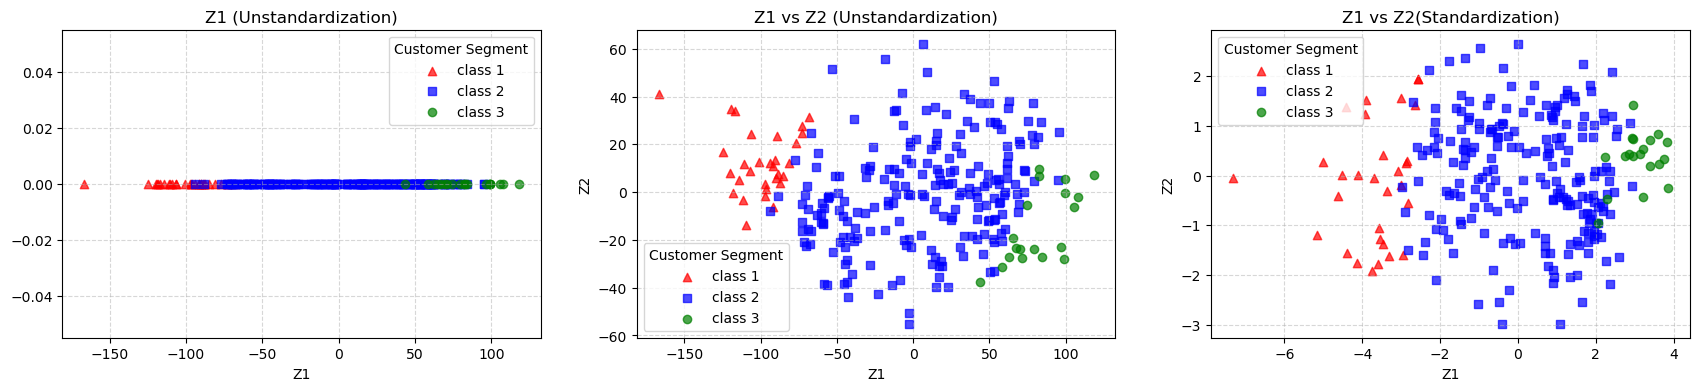

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#
pca_1=PCA(n_components=1)
Z=pca_1.fit_transform(df)

#print("Z(Unstandardization):\n{}".format(Z))
print("explained_variance(Unstandardization):\n{}".format(pca_1.explained_variance_))
print("explained_variance_ratio(Unstandardization):\n{}".format(pca_1.explained_variance_ratio_))
print("pca_components(Unstandardization):\n{}".format(pca_1.components_))

print(pca_1.components_.shape)
v1=pca_1.components_[0]
print("v1:\n{}".format(v1))


fig=plt.figure(figsize=(21,4))
ax1=fig.add_subplot(1,3,1)
label=data["ranking"]
class_marker={1:"^",2:"s",3:"o"}
class_color={1:"red",2:"blue",3:"green"}

for i in np.unique(data["ranking"]):
    idx=i==data["ranking"],
    ax1.scatter(Z[idx],np.zeros_like(Z[idx]),
               label=f"class {i}",
               marker=class_marker[i],
               color=class_color[i],
               alpha=0.7)
ax1.set_xlabel("Z1")
ax1.set_title("Z1 (Unstandardization)")
ax1.legend(title="Customer Segment")
ax1.grid(True, linestyle="--", alpha=0.5)

#
pca=PCA(n_components=2)
Z=pca.fit_transform(df)

#print("Z(Unstandardization):\n{}".format(Z))
print("explained_variance(Unstandardization):\n{}".format(pca.explained_variance_))
print("explained_variance_ratio(Unstandardization):\n{}".format(pca.explained_variance_ratio_))
print("pca_components(Unstandardization):\n{}".format(pca.components_))

print(pca.components_.shape)
v1=pca.components_[0]
print("v1:\n{}".format(v1))

v2=pca.components_[1]
print("v2:\n{}".format(v2))


UZ1=Z[:,0]
UZ2=Z[:,1]

ax2=fig.add_subplot(1,3,2)
label=data["ranking"]
class_marker={1:"^",2:"s",3:"o"}
class_color={1:"red",2:"blue",3:"green"}

for i in np.unique(data["ranking"]):
    idx=i==data["ranking"],
    ax2.scatter(UZ1[idx],UZ2[idx],
               label=f"class {i}",
               marker=class_marker[i],
               color=class_color[i],
               alpha=0.7)
ax2.set_xlabel("Z1")
ax2.set_ylabel("Z2")
ax2.set_title("Z1 vs Z2 (Unstandardization)")
ax2.legend(title="Customer Segment")
ax2.grid(True, linestyle="--", alpha=0.5)

#

#
scaler=StandardScaler()
df_standardized=scaler.fit_transform(df)
pca_2=PCA(n_components=2)
Z_2=pca_2.fit_transform(df_standardized)

#print("Z(Standardization):\n{}".format(Z_2))
print("explained_variance(Standardization):\n{}".format(pca_2.explained_variance_))
print("explained_variance_ratio(Standardization):\n{}".format(pca_2.explained_variance_ratio_))
print("pca_components(Standardization):\n{}".format(pca_2.components_))

print(pca.components_.shape)
v1=pca_2.components_[0]
print("v1:\n{}".format(v1))

v2=pca_2.components_[1]
print("v2:\n{}".format(v2))


Z1_2=Z_2[:,0]
Z2_2=Z_2[:,1]

ax4=fig.add_subplot(1,3,3)
label=data["ranking"]
class_marker={1:"^",2:"s",3:"o"}
class_color={1:"red",2:"blue",3:"green"}
for i in np.unique(data["ranking"]):
    idx=i==data["ranking"],
    ax4.scatter(Z1_2[idx],Z2_2[idx],
               label=f"class {i}",
               marker=class_marker[i],
               color=class_color[i],
               alpha=0.7)
ax4.set_xlabel("Z1")
ax4.set_ylabel("Z2")
ax4.set_title("Z1 vs Z2(Standardization)")
ax4.legend(title="Customer Segment")
ax4.grid(True, linestyle="--", alpha=0.5)




<ul>
    <p><b>數據發現:</b> <span style=''>  
    <p><li><b><span style=''>Z1未標準化數據: 
      <ul>
      <p>Class1在Z1指標上表現較差
      <p>Class2在Z1指標上表現較好<span style=''> </li>
      </ul>
    <p><li><b><span style=''>Z1 vs Z2（未標準化數據）
      <ul>
      <p>Class1在Z2多數聚類於正值區域，通常在負的Z1值區域
      <p>Class2在Z1受Z1和 Z2雙重影響，分布範圍較廣
      <p>Class3在Z2大部分聚類於負值區域，通常在正的Z1值區域
      <span style=''> </li>
      </ul>
    <span style=''> </li>
    <p><li><b><span style=''>Z1 vs Z2（標準化數據）:
      <ul>
      <p>Class1標準化後，Z2內部產生較大變異，可能存在兩種極端情況，通常在負的Z1值區域
      <p>Class 2 受Z1和 Z2雙重影響，標準化數據後分布更加對稱
      <p>Class3標準化後，在Z從分布負值區域轉到正值區域，仍集中在正的Z1值區域<span style=''> </li>

</ul>

<h5 style=''>6.採三個主成分繪製立體圖</h5>
<ul>
    <p><li><b>pca.fit_transform:</b><p><span style=''> 計算降維後兩個主成分分別為Z1及Z2及Z3</li>
    <p><li><b>pca.explained_variance_:</b><p><span style=''> 計算降維後新變數 Z1, Z2 ,Z3的變異數</li>
    <p><li><b>pca.explained_variance_ratio_:</b><p><span style=''> 每個主成分解釋總變異的比例</li>
    <p><li><b>pca.components_:</b><p><span style=''>主成分的方向代表新的座標軸，參數v1為新座標軸Z1向量，參數v2為新座標軸Z2向量,參數v3為新座標軸Z3向量</li>
    <p><li><b>fig.add_subplot:</b><p></li>
    <p><span style=''>Z1 vs Z2 vs Z3:<p><span style=''><p>
    <p><span style=''>
</ul>

Explained Variance:
[4.33288004 1.33472329 1.04848854]
Explained variance ratio:
[0.47960058 0.1477387  0.11605577]
PCA Components:
[[ 0.4742475   0.40719822  0.19304819  0.31296231  0.36243241 -0.30515866
  -0.28797152 -0.40819694 -0.00587403]
 [-0.01143901 -0.18147013  0.67437004  0.04657775 -0.24699211  0.28493274
  -0.33841865 -0.02600878 -0.50259118]
 [ 0.03354743 -0.26984085  0.20716289  0.31204003  0.05487992  0.4893735
  -0.07616812 -0.16664864  0.7139352 ]]
v1:
[ 0.4742475   0.40719822  0.19304819  0.31296231  0.36243241 -0.30515866
 -0.28797152 -0.40819694 -0.00587403]
v2:
[-0.01143901 -0.18147013  0.67437004  0.04657775 -0.24699211  0.28493274
 -0.33841865 -0.02600878 -0.50259118]
v3:
[ 0.03354743 -0.26984085  0.20716289  0.31204003  0.05487992  0.4893735
 -0.07616812 -0.16664864  0.7139352 ]


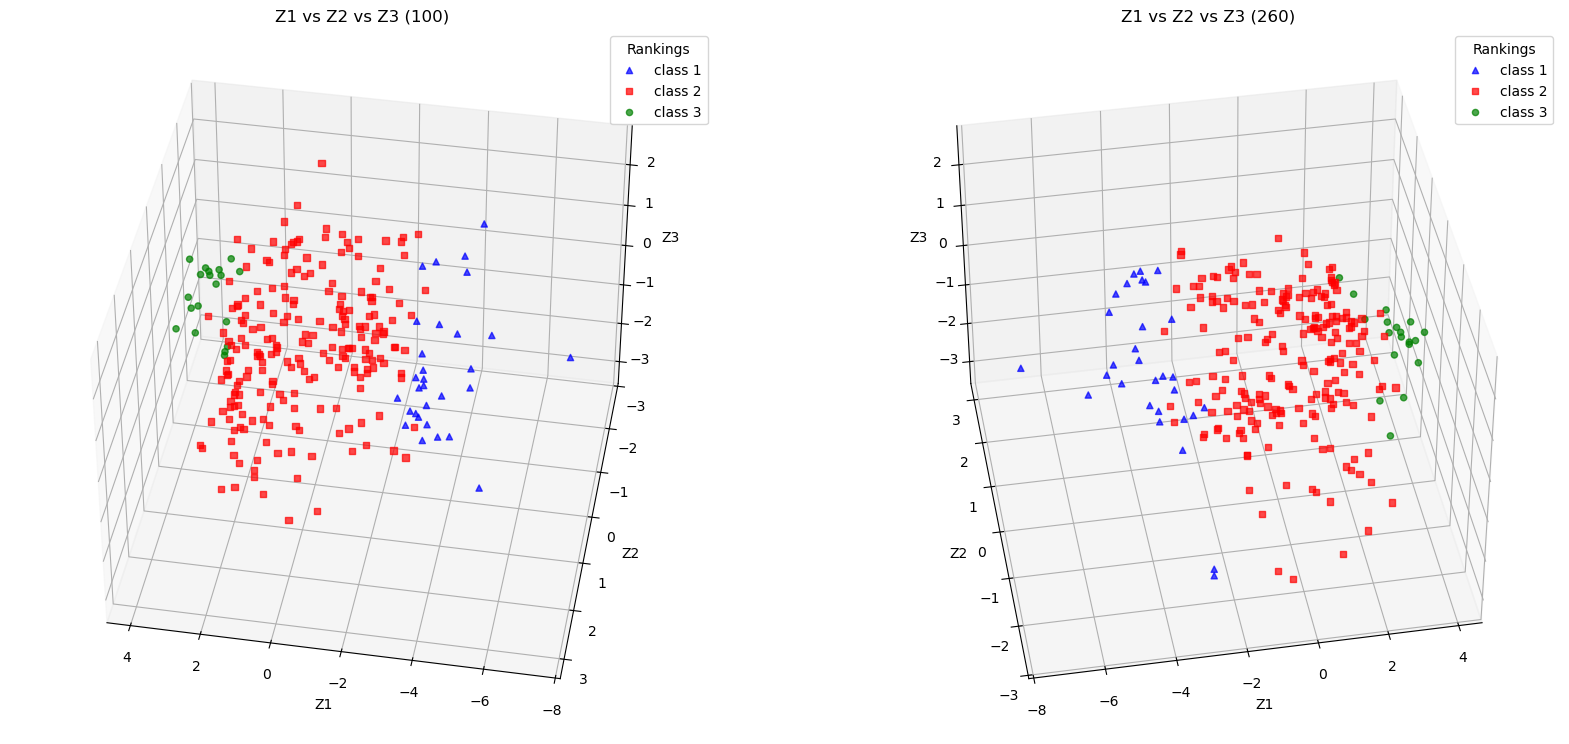

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
scaler=StandardScaler()
pca_3=PCA(n_components=3)
Z=pca_3.fit_transform(df_standardized)

print("Explained Variance:\n{}".format(pca_3.explained_variance_))
print("Explained variance ratio:\n{}".format(pca_3.explained_variance_ratio_))
print("PCA Components:\n{}".format(pca_3.components_))

v1=pca_3.components_[0]
print("v1:\n{}".format(v1))
v2=pca_3.components_[1]
print("v2:\n{}".format(v2))
v3=pca_3.components_[2]
print("v3:\n{}".format(v3))

Z1,Z2,Z3=Z[:,0],-Z[:,1],Z[:,2]

labels=data["ranking"]
class_markers = {1: "^", 2: "s", 3: "o"} 
class_colors = {1: "blue", 2: "red", 3: "green"} 
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(1,2,1,projection='3d')
for class_label in np.unique(labels):
    idx = labels == class_label  # 找到屬於該類別的數據
    ax.scatter(Z1[idx],Z2[idx],Z3[idx],
               label=f"class {class_label}", 
               marker=class_markers[class_label], 
               c=class_colors[class_label], 
               alpha=0.7)
ax.set_title("Z1 vs Z2 vs Z3 (100)")
ax.set_xlabel("Z1")
ax.set_ylabel("Z2")
ax.set_zlabel("Z3")
ax.legend(title="Rankings")
ax.grid(True, linestyle="--", alpha=0.5)
 
ax.view_init(elev=40, azim=100) 



ax1=fig.add_subplot(1,2,2,projection='3d')
for class_label in np.unique(labels):
    idx = labels == class_label  # 找到屬於該類別的數據
    ax1.scatter(Z1[idx],Z2[idx],Z3[idx],
               label=f"class {class_label}", 
               marker=class_markers[class_label], 
               c=class_colors[class_label], 
               alpha=0.7)
ax1.set_title("Z1 vs Z2 vs Z3 (260)")
ax1.set_xlabel("Z1")
ax1.set_ylabel("Z2")
ax1.set_zlabel("Z3")
ax1.legend(title="Rankings")
ax1.grid(True, linestyle="--", alpha=0.5)
 
ax1.view_init(elev=40, azim=260) 
plt.show()



<ul>
    <p><b>數據發現:</b> <span style=''>  
    <p><li><b><span style=''>Z1、Z2、Z3標準化數據: 
    <ul>
      <p>Class1 Z1 低、Z3 低、Z2 分佈較廣
      <p>Z1 vs Z2 難以完全區分 Class 2，但 Z3 進一步細化了這些城市的類別
      <p>Class3在Z1 高、Z3 高、Z2 影響較小
      <span style=''> </li>
    </ul>
</ul>

<h5 style=''>7.從 Z1 與 Z2 的散佈圖進一步推敲，也許需要加入 Z3 才能分得更好，又或許去除 Z2 僅取 Z1 也可以分得不錯。</h5>
<ul>
    <p><li><b>論點:</b><p><span style=''>雖然在主成分分析中依序加入第二與第三主成分（Z2、Z3），理論上應可提供更多變異資訊，有助於資料的可視化與群體辨識。但從圖形觀察可見，分群效果並未因為額外主成分的加入而顯著改善。所以，選取一主成分視覺化為最佳選擇。</li>
    

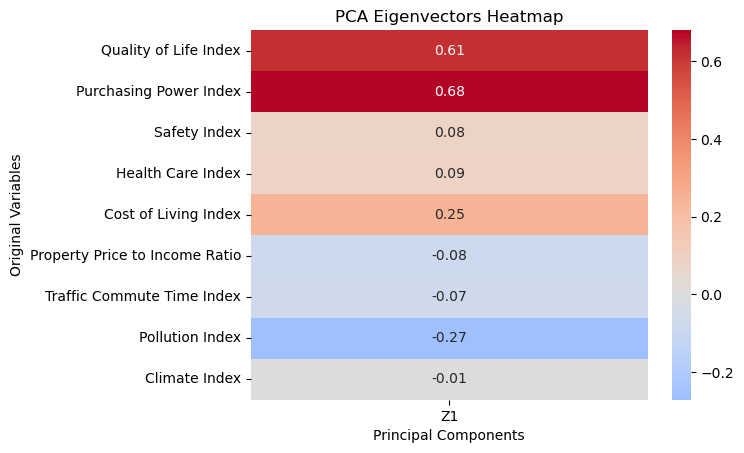

In [17]:
eigenvectors=pca_1.components_
eigenvectors_df=pd.DataFrame(eigenvectors.T,columns=["Z1"],index=df.columns)
sns.heatmap(eigenvectors_df,annot=True,cmap="coolwarm",center=0,fmt=".2f")
plt.title("PCA Eigenvectors Heatmap")
plt.xlabel("Principal Components")
plt.ylabel("Original Variables")
plt.show()

<h5 style=''>8.可否從 Z1 與 Z2 的組成係數，看出原變數哪個比較重要</h5>
<ul>
    <p><li><b>sns.heatmap 製作熱圖:</b><p><span style=''>PCA 降維後的新座標軸（主成分）主要由哪些原始變數組成 </li>
        <ul>
        <li><p>Z1主要由 Quality of Life Index(0.47), Purchasing Power Index(0.41)、Cost of Living Index(0.36)
        <li><p> Z2主要由 Safety Index (0.67)、Property Price to Income Ratio (0.28)
        </ul>

</ul>

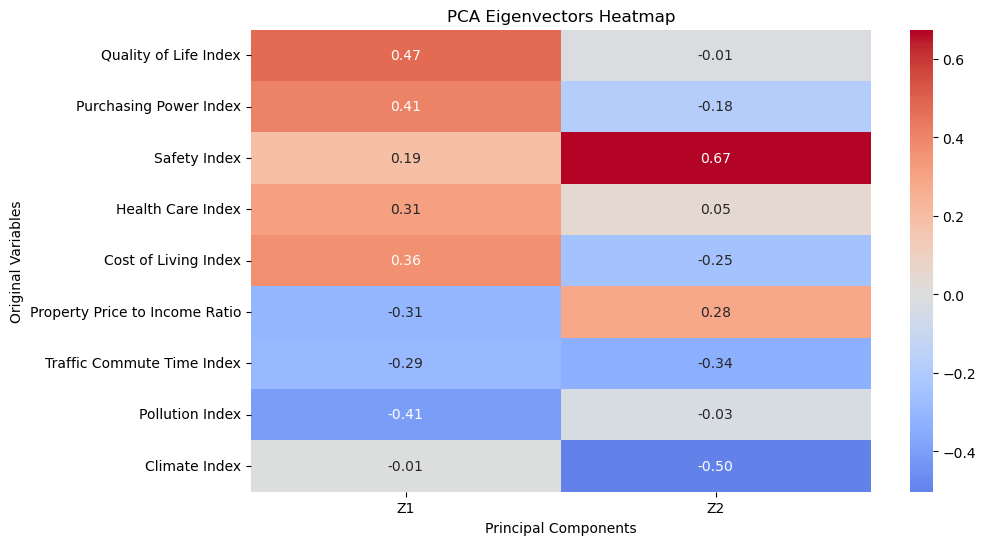

In [16]:

fig,ax=plt.subplots(figsize=(10,6))
eigenvectors=pca_2.components_
eigenvectors_df=pd.DataFrame(eigenvectors.T,columns=["Z1","Z2"],index=df.columns)
sns.heatmap(eigenvectors_df,annot=True,cmap="coolwarm",center=0,fmt=".2f")
plt.title("PCA Eigenvectors Heatmap")
plt.xlabel("Principal Components")
plt.ylabel("Original Variables")
plt.show()



